#### Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("height-weight.csv")
df.head()

Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160

Text(0, 0.5, 'Height')

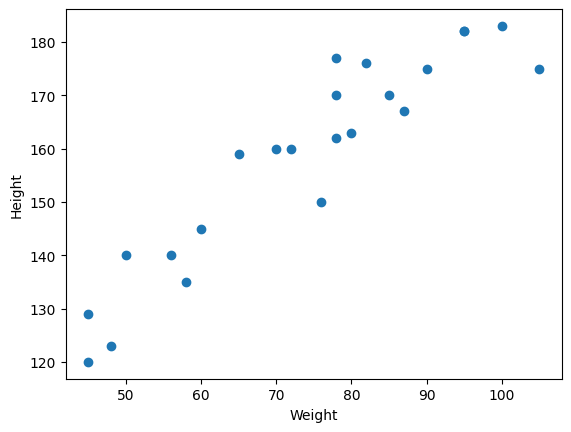

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
df.corr()

Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000

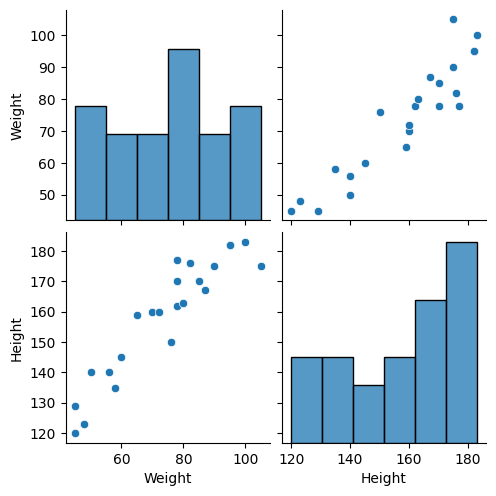

In [6]:
sns.pairplot(df)

In [7]:
#### Split Independent and depenedent features
x=df[['Weight']] ## We used 2 [[]] because x will be a dataframe otherwise it will be a series
y=df['Height'] ## Can be in series because in any problem there will be only one output feature

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
x_train.shape

(17, 1)

In [12]:
### Standardization (using Ztest)
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train) ## We are using z which is x-mean/sd
x_test=scaler.transform(x_test) ## We use transform because we use mean and sd of train dataset here also we should not calaculate sd and mean of test because we  should not know any information about test dataset including mean and sd which mean data leakage which is not good


In [16]:
### lets do simple linear regression
from sklearn.linear_model import LinearRegression

In [17]:
regression=LinearRegression()

In [20]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
regression.coef_ ### it is coeffecient value beta1 or m in y=mx+c

array([17.2982057])

In [22]:
regression.intercept_ ## We will get c or beta0 means constant

np.float64(156.47058823529412)

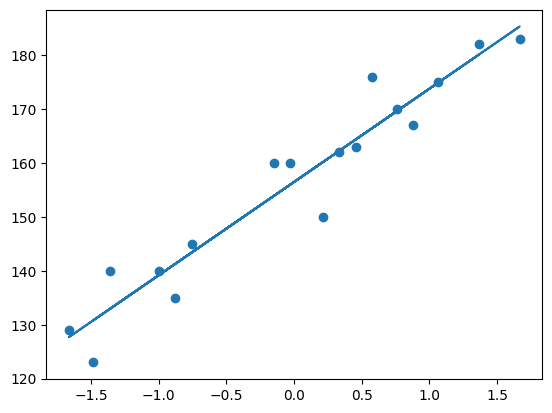

In [26]:
### Plot Best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [27]:
## prediction for test data
y_pred=regression.predict(x_test)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


#### Now lets check R square value

In [31]:
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


### Now lets check using OLS

In [34]:
import statsmodels.api as sm


In [35]:
model=sm.OLS(y_train,x_train).fit()

In [36]:
predicted=model.predict(x_test)

In [39]:
model.summary() ## We get same coefficient value for this as same as previous

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 08 Jun 2025   Prob (F-statistic):                       0.664
Time:                        09:57:24   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### Now if we want to predict then we have to do in this way
regression.predict(scaler.transform([[72]])) ## Person with 72kgs (72 is standardized using mean and sd of the model)

d:\anaconda3\envs\covid_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])